In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [14]:
dataset = pd.read_csv('../data/heart_failure/heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
dataset['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [ ]:
# Random sampling
# train = dataset.sample(frac=0.8)
# test = dataset.drop(train.index)

#Stratified sampling
train = dataset.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.8)
# trainvalidation = dataset.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.8)
test = dataset.drop(train.index)
# test = dataset.drop(trainvalidation.index)
# train = trainvalidation.groupby('DEATH_EVENT', group_keys=False)[dataset.columns].sample(frac=0.75)
# validation = trainvalidation.drop(train.index)

print(train['DEATH_EVENT'].value_counts()/train.shape[0])
# print(validation['DEATH_EVENT'].value_counts()/validation.shape[0])
print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677778
1    0.322222
Name: count, dtype: float64
DEATH_EVENT
0    0.677966
1    0.322034
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [ ]:
# train, test = train_test_split(dataset, test_size=0.2, stratify=dataset['DEATH_EVENT'])
# print(train['DEATH_EVENT'].value_counts()/train.shape[0])
# print(test['DEATH_EVENT'].value_counts()/test.shape[0])

DEATH_EVENT
0    0.677824
1    0.322176
Name: count, dtype: float64
DEATH_EVENT
0    0.683333
1    0.316667
Name: count, dtype: float64


In [ ]:
train_features = train.drop('DEATH_EVENT', axis=1)
train_targets = train['DEATH_EVENT']
# validation_features = validation.drop('DEATH_EVENT', axis=1)
# validation_targets = validation['DEATH_EVENT']
test_features = test.drop('DEATH_EVENT', axis=1)
test_targets = test['DEATH_EVENT']

In [6]:
classifier1 = DecisionTreeClassifier()
# classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier1.fit(train_features, train_targets)

DecisionTreeClassifier()

In [7]:
classifier1.score(test_features, test_targets)


0.7

In [27]:
def evaluate_model(classifier, features, targets):
    predictions = classifier.predict(features)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Confusion: {confusion_matrix(targets, predictions)}')

In [28]:
evaluate_model(classifier1, train_features, train_targets)
evaluate_model(classifier1, test_features, test_targets)
# train_predictions = classifier1.predict(train_features)
# test_predictions = classifier1.predict(test_features)
# print(f'Accuracy {accuracy_score(train_targets, train_predictions)} Precision {precision_score(train_targets, train_predictions)} Recall {recall_score(train_targets, train_predictions)}')
# print(f'Accuracy {accuracy_score(test_targets, test_predictions)} Precision {precision_score(test_targets, test_predictions)} Recall {recall_score(test_targets, test_predictions)}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion: [[162   0]
 [  0  77]]
Accuracy: 0.70
Precision: 0.52
Recall: 0.63
Confusion: [[30 11]
 [ 7 12]]


[[30 11]
 [ 7 12]]


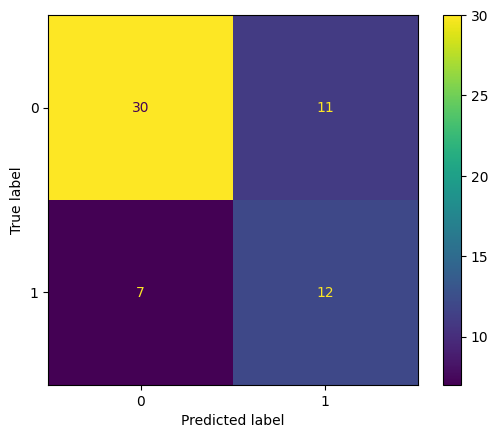

In [ ]:
# print(confusion_matrix(test_targets, test_predictions))
# ConfusionMatrixDisplay.from_predictions(test_targets, test_predictions)

In [9]:
classifier2 = DecisionTreeClassifier(max_depth=3)
# classifier1.fit(train.drop('DEATH_EVENT', axis=1), train['DEATH_EVENT'])
classifier2.fit(train_features, train_targets)

DecisionTreeClassifier(max_depth=3)

In [29]:
evaluate_model(classifier2, train_features, train_targets)
evaluate_model(classifier2, test_features, test_targets)
# train_predictions2 = classifier2.predict(train_features)
# test_predictions2 = classifier2.predict(test_features)
# print(f'Accuracy {accuracy_score(train_targets, train_predictions2)} Precision {precision_score(train_targets, train_predictions2)} Recall {recall_score(train_targets, train_predictions2)}')
# print(f'Accuracy {accuracy_score(test_targets, test_predictions2)} Precision {precision_score(test_targets, test_predictions2)} Recall {recall_score(test_targets, test_predictions2)}')

Accuracy: 0.90
Precision: 0.91
Recall: 0.77
Confusion: [[156   6]
 [ 18  59]]
Accuracy: 0.75
Precision: 0.60
Recall: 0.63
Confusion: [[33  8]
 [ 7 12]]


[Text(0.5, 0.875, 'x[11] <= 67.5\ngini = 0.437\nsamples = 239\nvalue = [162, 77]'),
 Text(0.25, 0.625, 'x[11] <= 49.5\ngini = 0.219\nsamples = 56\nvalue = [7, 49]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 50.5\ngini = 0.122\nsamples = 46\nvalue = [3, 43]'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.1875, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.375, 0.375, 'x[8] <= 136.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.75, 0.625, 'x[4] <= 32.5\ngini = 0.259\nsamples = 183\nvalue = [155, 28]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 1.35\ngini = 0.49\nsamples = 42\nvalue = [24, 18]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.6875, 0.125, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.875, 0.375, 'x[0] <= 74.0\ngini

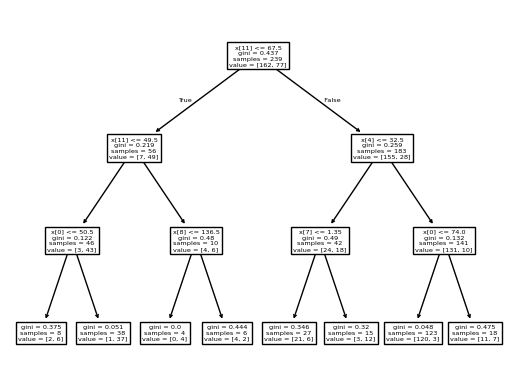

In [11]:
from sklearn.tree import plot_tree
plot_tree(classifier2)